In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

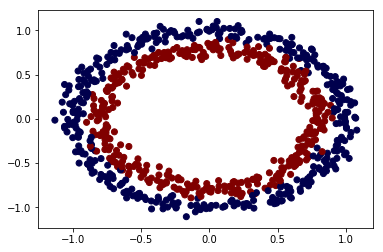

In [64]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap='seismic')

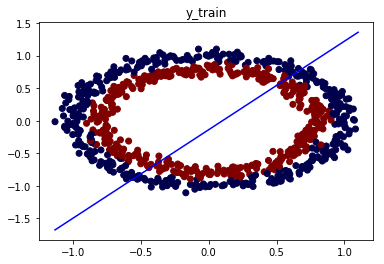

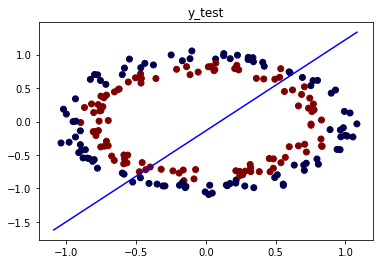

Error Out: 0.54


In [73]:
# Thanks to Michel Danjou and Abhijit Sinha 
# for the examples which enabled me to find my mistakes in my implementation

class LinearClassifier:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)        
        pseudo_inv_matrix = np.linalg.pinv(X)
        weight_matrix = pseudo_inv_matrix.dot(y)
        self.w = weight_matrix
        
    def calculate_error(self, predictions, true):
        errors = 0
        for x,y in zip(predictions, true):
            if (x !=y):
                errors+=1
        return errors / len(predictions)

    def predict_class(self, X):
        X = np.insert(X, 0, 1, axis=1)
        # Function to predict the classification label for the input data X
        return np.sign(np.dot(X, np.transpose(self.w)))
    
    def predict(self, X):
        return -(self.w[0]+self.w[1]*X)/self.w[2]
    
    def plot(self, X, Y, title=""):
        X = np.insert(X, 0, 1, axis=1)
        plt.scatter(X[:,1],X[:,2], c=Y, cmap='seismic')
        minx = X.min()
        maxx = X.max()
        miny = self.predict(minx) 
        maxy = self.predict(maxx) 
        plt.title(title)
        plt.plot([minx, maxx], [miny, maxy], color='blue')
        plt.show()

clf = LinearClassifier()
clf.fit(X_train, y_train)
clf.plot(X_train, y_train, "y_train")
clf.plot(X_test, y_test, "y_test")
pred = clf.predict_class(X_test)
error = clf.calculate_error(pred, y_test)
print("Error Out:", error)

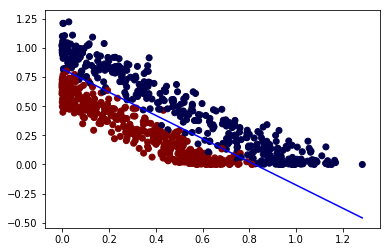

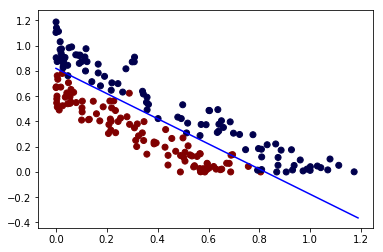

Error Out: 0.02


In [74]:
X2_train = X_train * X_train
X2_test = X_test * X_test
clf2 = LinearClassifier()
clf2.fit(X2_train, y_train)
clf2.plot(X2_train, y_train)
clf2.plot(X2_test, y_test)
pred = clf2.predict_class(X2_test)
error = clf2.calculate_error(pred, y_test)
print("Error Out:", error)


This is a much better score, however we cannot 'guarantee' that this will generalise well as we have broken the VC bound by data snooping. I will complete some more transformations now to compare. 

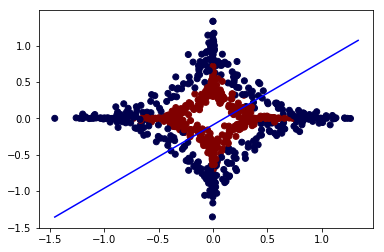

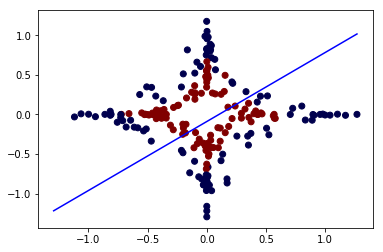

Error Out: 0.39


In [75]:
X3_train = X_train * X_train * X_train
X3_test = X_test * X_test * X_test

clf3 = LinearClassifier()
clf3.fit(X3_train, y_train)
clf3.plot(X3_train, y_train)
clf3.plot(X3_test, y_test)
pred = clf2.predict_class(X3_test)
error = clf2.calculate_error(pred, y_test)
print("Error Out:", error)


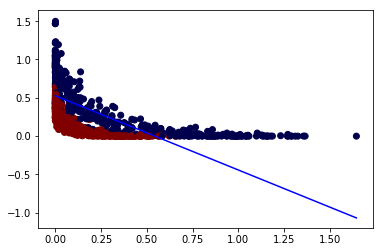

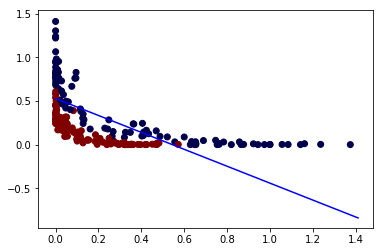

Error Out: 0.32


In [76]:
X3_train = X_train * X_train  * X_train * X_train
X3_test = X_test * X_test * X_test * X_test

clf3 = LinearClassifier()
clf3.fit(X3_train, y_train)
clf3.plot(X3_train, y_train)
clf3.plot(X3_test, y_test)
pred = clf2.predict_class(X3_test)
error = clf2.calculate_error(pred, y_test)
print("Error Out:", error)

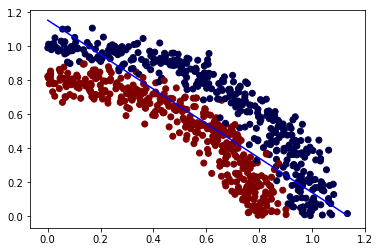

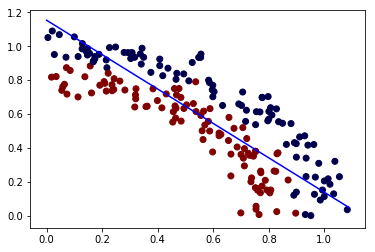

Error Out: 0.225


In [77]:
X3_train = np.absolute(X_train)
X3_test = np.absolute(X_test)

clf3 = LinearClassifier()
clf3.fit(X3_train, y_train)
clf3.plot(X3_train, y_train)
clf3.plot(X3_test, y_test)
pred = clf3.predict_class(X3_test)
error = clf3.calculate_error(pred, y_test)
print("Error Out:", error)

X^2 appears to give the best error with our implementation of linear classification. We can see that the absolute values element wise of X also appears to give a linearly seperable dataset however our error is much higher. 


We will now compare results of Sklearn Logistic regression with both these datasets. I suspect that it will perform similarly on both dataset as the linear seperator looks pretty good on both

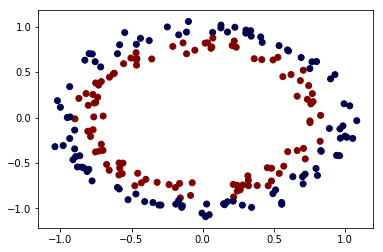

0.98


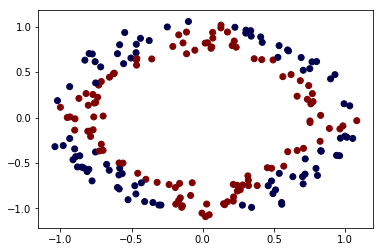

0.76


In [81]:
clf = LogisticRegression()
clf.fit(X2_train, y_train)
y_pred = clf.predict(X2_test)
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, cmap='seismic')
plt.show()
print(accuracy_score(y_pred, y_test))
clf = LogisticRegression()
clf.fit(X3_train, y_train)
y_pred = clf.predict(X3_test)
plt.scatter(X_test[:,0],X_test[:,1], c=y_pred, cmap='seismic')
plt.show()
print(accuracy_score(y_pred, y_test))

Implemented linear regression works just as well as the out of the box logistic regression on the linearly seperable datasets